In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd
import re

In [3]:
!ls

Python Capstone Project 3 pdf Updated.pdf
Untitled.ipynb
data_cleaning.xlsx
final_clean_data.csv
test.csv
train.csv


In [4]:
df=pd.read_excel('data_cleaning.xlsx',sheet_name='Usage')

In [5]:
app=pd.DataFrame({df.columns[0]:[df.columns[0]]})
df=df.append(app).reset_index(drop=True)
df.columns=['Usage']

In [6]:
pattern=re.compile(r'(?P<clock>\d+)\s?([AMP]{2})\s+[A-Za-z]*\s*(?P<day>\d+)(?:th|rd|st|nd)*-(?P<month>[A-Za-z]{3})-(?P<year>\d{4})_+(?P<kwh>\d+\.\d+)')
clock=[]
am_pm=[]
day=[]
month=[]
year=[]
kwh=[]
for row in df.values.reshape(1,-1)[0]:
    result=pattern.findall(row)[0]
    clock.append(result[0])
    am_pm.append(result[1])
    day.append(result[2])
    month.append(result[3])
    year.append(result[4])
    kwh.append(result[5])

In [7]:
clean_df=pd.DataFrame({'clock':clock,
                       'AM/PM':am_pm,
             'day':day,
             'month':month,
             'year':year,
             'kwh':kwh,
                       'orijinal_data':df.values.reshape(1,-1)[0]})

In [8]:
time_func= lambda x:pd.to_datetime(f"{x['year']}-{x['month']}-{x['day']} {x['clock']}{x['AM/PM']}")
clean_df['full_time']=clean_df.apply(func= time_func,axis=1)

In [9]:
time_series_data=clean_df.set_index('full_time')
time_series_data['kwh']=time_series_data['kwh'].astype('float')
time_series_data['week_day']=(time_series_data.index.weekday+1)

In [10]:
time_series_data.sort_index(ascending=True,inplace=True)

In [11]:
time_series_data.to_csv('final_clean_data.csv')

In [12]:
time_series_kwh=time_series_data['kwh']

# Visualize

In [13]:
%matplotlib notebook
time_series_kwh.resample('m').sum().plot()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='full_time'>

<IPython.core.display.Javascript object>


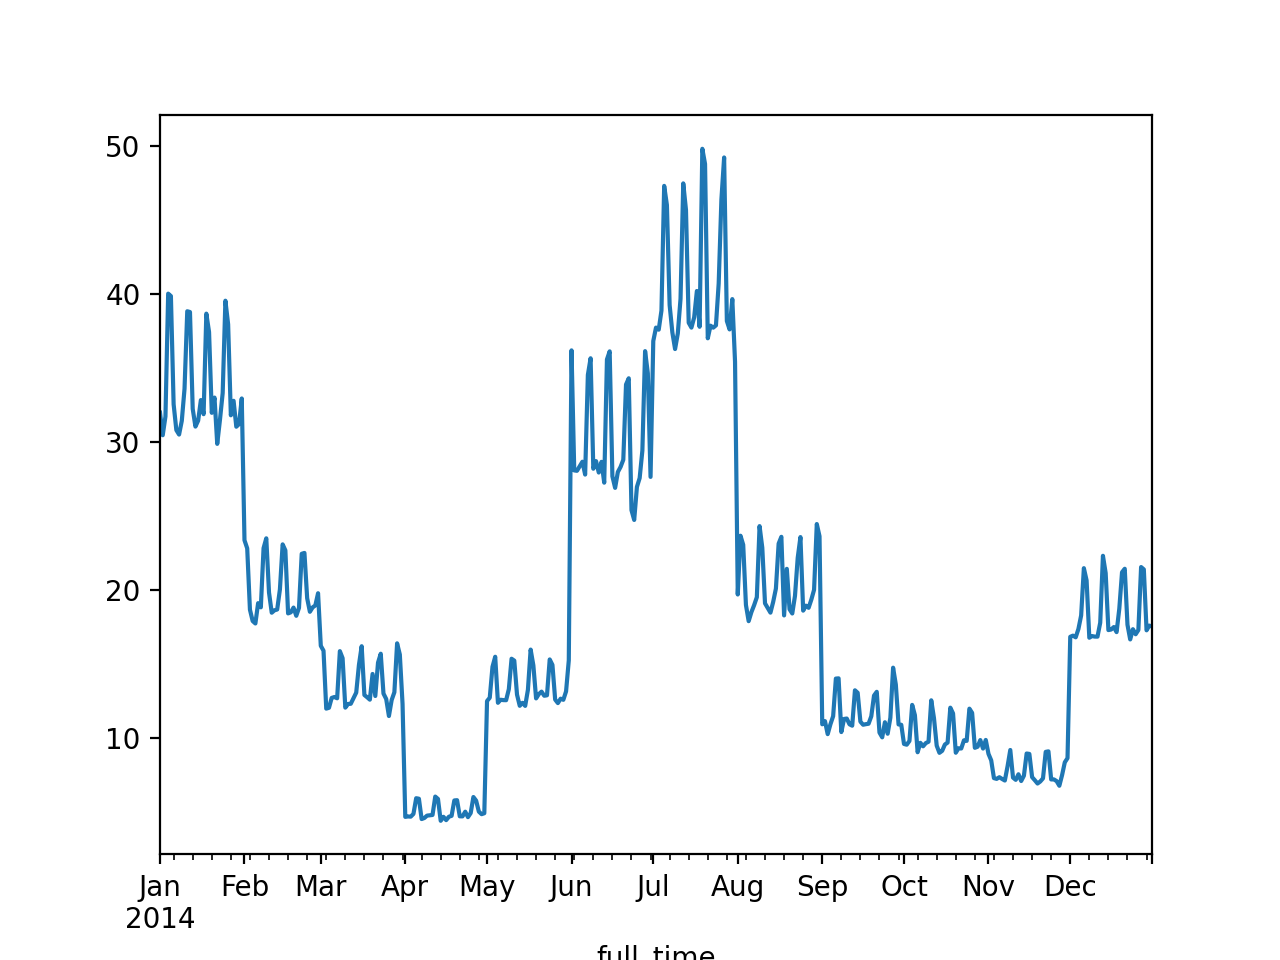

<AxesSubplot:xlabel='full_time'>

In [209]:
%matplotlib notebook
time_series_kwh.resample('d').sum().plot()

<IPython.core.display.Javascript object>


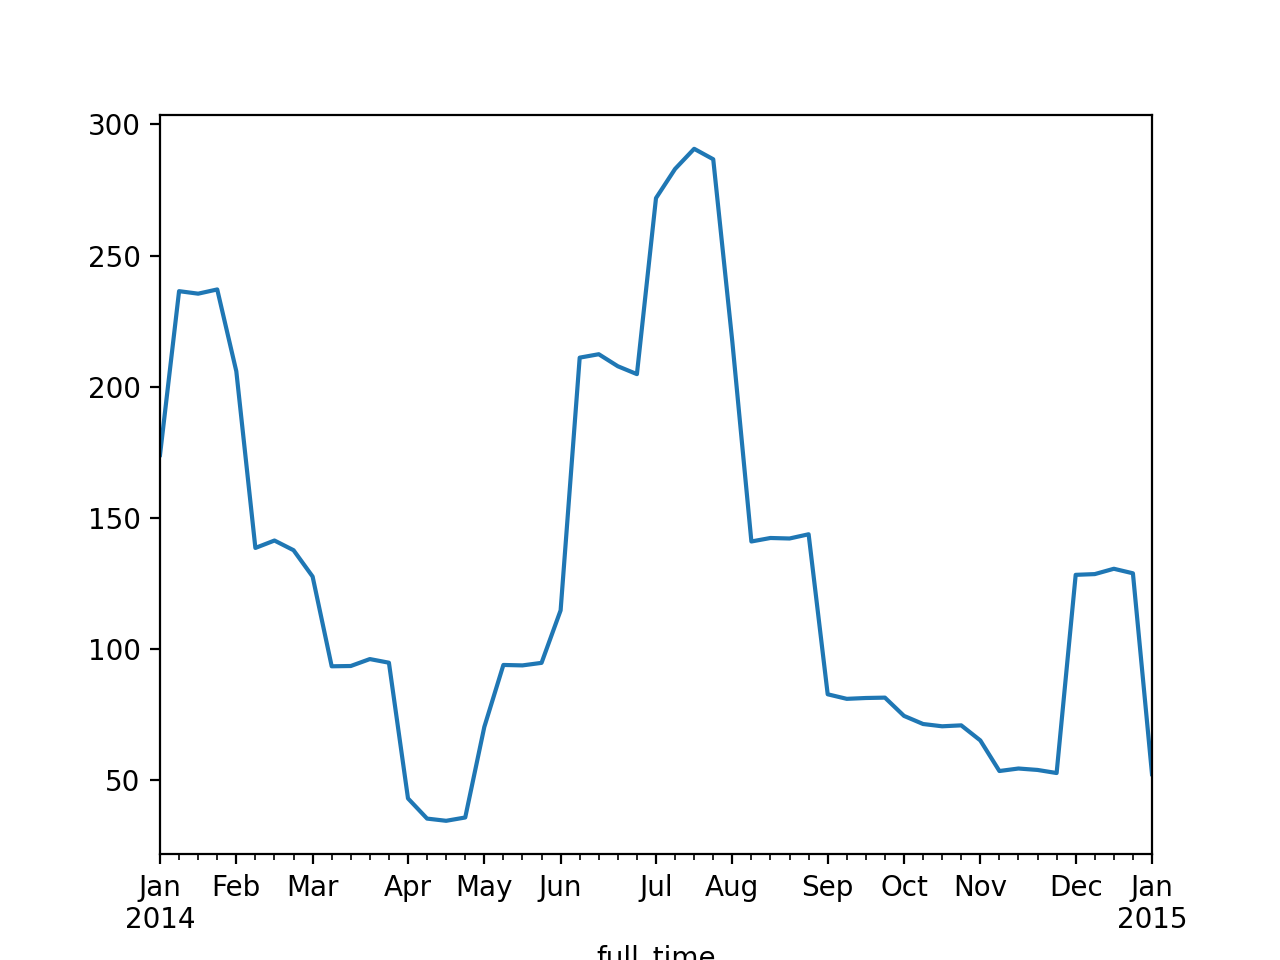

<AxesSubplot:xlabel='full_time'>

In [229]:
%matplotlib notebook
time_series_kwh.resample('W').sum().plot()

<IPython.core.display.Javascript object>


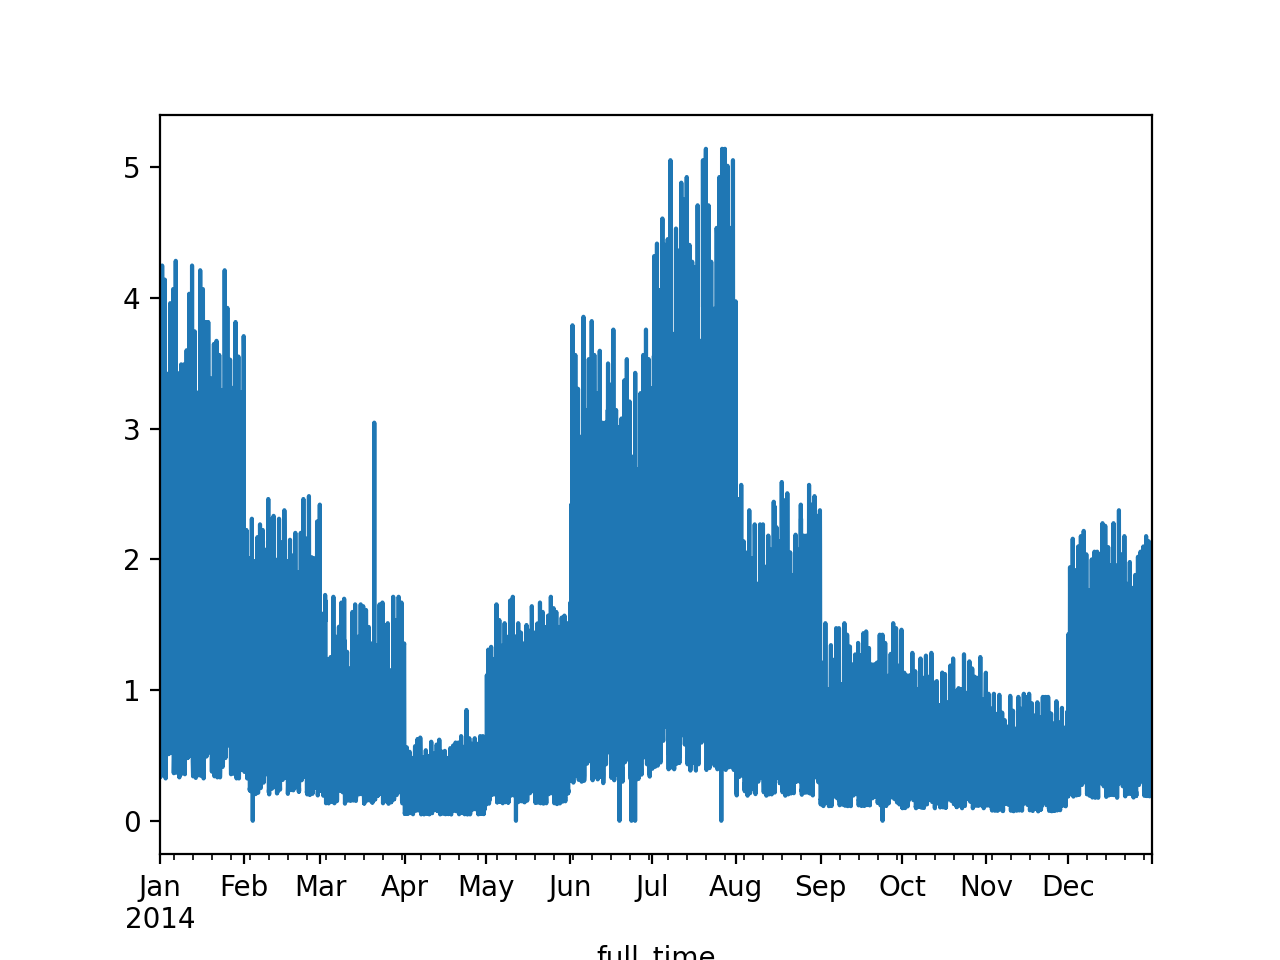

<AxesSubplot:xlabel='full_time'>

In [210]:
%matplotlib notebook
time_series_kwh.resample('h').sum().plot()

# Calculate

In [211]:
#hourly
hourly_prices=pd.Series([0.1 , 0.1 , 0.1 , 0.1 , 0.15, 0.2 , 0.24, 0.24, 0.26, 0.2 , 0.2 ,
       0.26, 0.26, 0.2 , 0.24, 0.18, 0.15, 0.3 , 0.24, 0.24, 0.12, 0.11,
       0.1 , 0.1 ],name='hourly prices')

horly_kwh=time_series_kwh.groupby(time_series_kwh.index.hour).sum()
hourly_consumption=(horly_kwh*hourly_prices).sum()

In [212]:
#monthly
monthly_prices=pd.Series([0.2 , 0.19, 0.17, 0.18, 0.22, 0.27, 0.24, 0.19, 0.18, 0.15, 0.14,0.19],index=range(1,13),
                        name='monthly prices')

monthly_kwh=time_series_kwh.groupby(time_series_kwh.index.month).sum()
monthly_consumption=(monthly_kwh*monthly_prices).sum()

In [213]:
#yearly
yearly_consumption=time_series_kwh.sum()*0.21

# Report

In [237]:
print(f'illik serfiyyat:{time_series_kwh.sum()} kwh')

illik serfiyyat:6848.114 kwh


In [215]:
print(f'illik kontrakt ile  xerc:{yearly_consumption} USD')

illik kontrakt ile  xerc:1438.10394 USD


In [216]:
print(f'ayliq kontrakt ile  xerc:{monthly_consumption} USD')

ayliq kontrakt ile  xerc:1421.20577 USD


In [217]:
print(f'saatliq kontrakt ile xerc:{hourly_consumption} USD')

saatliq kontrakt ile xerc:1368.97647 USD


<IPython.core.display.Javascript object>


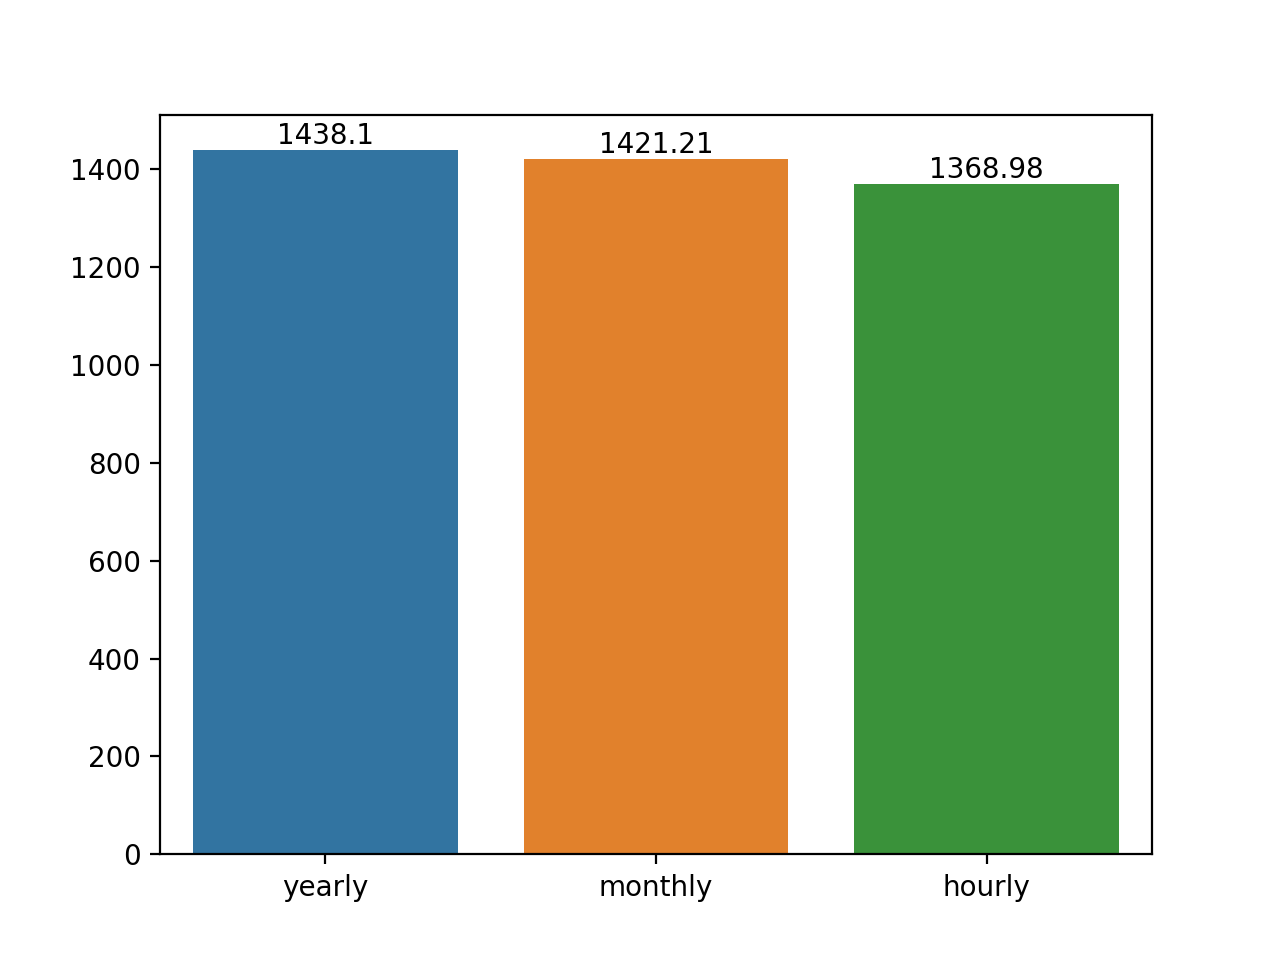

[Text(0, 0, '1438.1'), Text(0, 0, '1421.21'), Text(0, 0, '1368.98')]

In [171]:
import seaborn as sns

d={'yearly':yearly_consumption,
  'monthly':monthly_consumption,
  'hourly':hourly_consumption}

fig, ax = plt.subplots()
bar=sns.barplot(list(d.keys()),list(d.values()),ax=ax)
bar.bar_label(bar.containers[0])

# Question Answer

In [219]:
#1
round(time_series_kwh.mean(),3)

0.782

In [220]:
#2
round(time_series_kwh['2014/02'].mean(),3)

0.834

In [228]:
#3
time_series_data.groupby('week_day').mean().sort_values('kwh',ascending=False)

,kwh
week_day,
7,0.898601
6,0.890300
5,0.753666
4,0.746375
3,0.733699
1,0.725894
2,0.724843


In [266]:
#4
h4=[]
for i in range(8760-3):
    h4.append(time_series_kwh[i:i+4].sum())
pd.Series(h4).sort_values(ascending=False).iloc[0]

In [272]:
#5
print(f'ayliq kontrakt ile  xerc:{monthly_consumption} USD')

ayliq kontrakt ile  xerc:1421.20577 USD
